In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score


In [3]:
# Cargar los archivos CSV
df = pd.read_csv('../data/result/combined_data.csv')


In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81104 entries, 0 to 81103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   travelCode       81104 non-null  int64  
 1   userCode_flight  81104 non-null  int64  
 2   from             81104 non-null  object 
 3   to               81104 non-null  object 
 4   flightType       81104 non-null  object 
 5   price_flight     81104 non-null  float64
 6   time             81104 non-null  float64
 7   distance         81104 non-null  float64
 8   agency           81104 non-null  object 
 9   date_flight      81104 non-null  object 
 10  userCode_hotel   81104 non-null  int64  
 11  name_x           81104 non-null  object 
 12  place            81104 non-null  object 
 13  days             81104 non-null  int64  
 14  price_hotel      81104 non-null  float64
 15  total            81104 non-null  float64
 16  date_hotel       81104 non-null  object 
 17  code        

,travelCode,userCode_flight,price_flight,time,distance,userCode_hotel,days,price_hotel,total,code,age
count,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000
mean,67911.794461,666.963726,957.725281,1.424116,548.097771,666.963726,2.499679,214.439554,536.229513,666.963726,42.790615
std,39407.956381,391.134383,362.212893,0.543071,209.053667,391.134383,1.119319,76.741832,319.329514,391.134383,12.942576
min,0.000000,0.000000,301.510000,0.440000,168.220000,0.000000,1.000000,60.390000,60.390000,0.000000,21.000000
25%,33696.750000,323.000000,672.660000,1.040000,401.660000,323.000000,1.000000,165.990000,247.620000,323.000000,32.000000
50%,67831.000000,658.000000,899.600000,1.460000,562.140000,658.000000,2.000000,242.880000,495.240000,658.000000,42.000000
75%,102211.250000,1013.000000,1222.240000,1.760000,676.530000,1013.000000,4.000000,263.410000,742.860000,1013.000000,54.000000
max,135942.000000,1339.000000,1754.170000,2.440000,937.770000,1339.000000,4.000000,313.020000,1252.080000,1339.000000,65.000000


In [5]:
# Definir las características (X) y la variable objetivo (Y)
features = ['from', 'to', 'flightType', 'time', 'distance', 'agency', 'date_flight']
X = df[features]
Y = df['price_flight']

In [6]:
X = pd.get_dummies(X, columns=['from', 'to', 'flightType', 'agency', 'date_flight'])


In [7]:
# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Preparación de los datos (supongamos que X y y ya están definidos)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [18]:
# Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)
print(Y_pred_lr)
print('Linear Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print('R^2:', r2_score(Y_test, Y_pred_lr))


[1271.99191086 1278.41307135  722.13882723 ... 1045.52150028  823.11497765
 1022.3371776 ]
Linear Regression:
RMSE: 103.31619920167626
R^2: 0.9191762685931422


In [10]:
# Regresión Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)
Y_pred_ridge = model_ridge.predict(X_test)
print('Ridge Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)))
print('R^2:', r2_score(Y_test, Y_pred_ridge))


Ridge Regression:
RMSE: 103.26138626802373
R^2: 0.9192620055961576


In [29]:
# Regresión Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)
Y_pred_lasso = model_lasso.predict(X_test)
print('Lasso Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))
print('R^2:', r2_score(Y_test, Y_pred_lasso))


Lasso Regression:
RMSE: 102.63768995703975
R^2: 0.9202343712905006


c:\Users\Julio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+06, tolerance: 8.498e+05
  model = cd_fast.enet_coordinate_descent(


In [9]:
# Árbol de Decisión
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, Y_train)
Y_pred_tree = model_tree.predict(X_test)
print('Decision Tree Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_tree)))
print('R^2:', r2_score(Y_test, Y_pred_tree))


Decision Tree Regression:
RMSE: 0.4903802361750227
R^2: 0.999998179175989


In [10]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print('Random Forest Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print('R^2:', r2_score(Y_test, Y_pred_rf))


Random Forest Regression:
RMSE: 0.20813361569279892
R^2: 0.9999996719904318


In [32]:
# Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100)
model_gb.fit(X_train, Y_train)
Y_pred_gb = model_gb.predict(X_test)
print('Gradient Boosting Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_gb)))
print('R^2:', r2_score(Y_test, Y_pred_gb))


Gradient Boosting Regression:
RMSE: 39.83840343455877
R^2: 0.9879827276052375


In [33]:
# Support Vector Regression
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, Y_train)
Y_pred_svr = model_svr.predict(X_test)
print('Support Vector Regression:')
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_svr)))
print('R^2:', r2_score(Y_test, Y_pred_svr))


In [ ]:
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_lr)), 'R²:', r2_score(Y_test, Y_pred_lr))
print('Ridge Regression RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)), 'R²:', r2_score(Y_test, Y_pred_ridge))
#print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)), 'R²:', r2_score(Y_test, Y_pred_lasso))
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_tree)), 'R²:', r2_score(Y_test, Y_pred_tree))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_rf)), 'R²:', r2_score(Y_test, Y_pred_rf))
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_gb)), 'R²:', r2_score(Y_test, Y_pred_gb))
#print('Support Vector RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred_svr)), 'R²:', r2_score(Y_test, Y_pred_svr))


In [ ]:

# Evaluar el modelo
print(classification_report(Y_test, Y_pred_tree))
#print(confusion_matrix(Y_test, Y_pred_tree))

In [18]:

# Cross-Validation
scores = cross_val_score(model_tree, X, Y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.99998201 0.99998994 1.         0.99996557 1.        ]
Mean Cross-Validation Score: 0.9999875059875599


In [11]:

# Cross-Validation
scores = cross_val_score(model_rf, X, Y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.99999696 0.9999992  0.99999804 0.99996233 1.        ]
Mean Cross-Validation Score: 0.9999913034853563


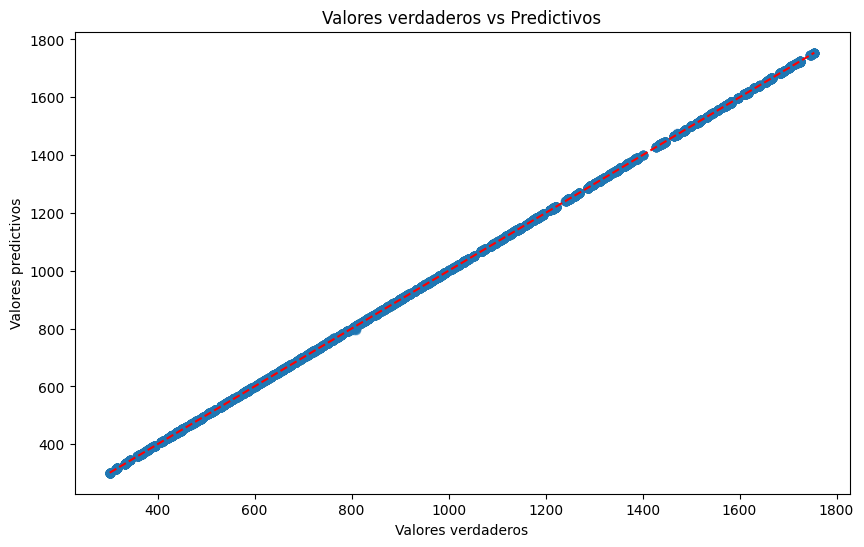

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rf, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores verdaderos')
plt.ylabel('Valores predictivos')
plt.title('Valores verdaderos vs Predictivos')
plt.show()

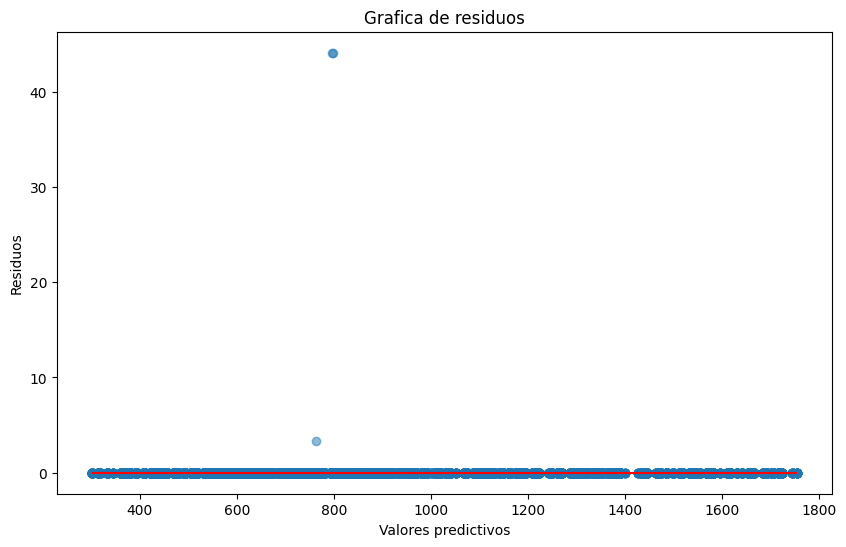

In [16]:
errors = Y_test - Y_pred_tree

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_rf, errors, alpha=0.5)
plt.hlines(y=0, xmin=Y_pred_tree.min(), xmax=Y_pred_tree.max(), colors='r')
plt.xlabel('Valores predictivos')
plt.ylabel('Residuos')
plt.title('Grafica de residuos')
plt.show()